# 2. Entrenamiento del modelo de Machine Learning

**Objetivo:** Utilizando el conjunto de
imágenes, construya un modelo que sea capaz de predecir el tipo de producto. Pruebe al
menos dos modelos diferentes. Recuerde utilizar de la siguiente manera cada conjunto:

- El conjunto de entrenamiento (train) para ajustar los hiperparámetros de los
modelos.
- El conjunto de prueba (test) para seleccionar el mejor modelo.
- El conjunto de validación (valid) para realizar el análisis de resultados del
modelo.

### 2.1 Preparación de los Datos

### Configuración de librerías

In [5]:
pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 17.2 MB/s eta 0:00:01
   ---------- ----------------------------- 2.9/11.0 MB 30.8 MB/s eta 0:00:01
   ------------------ --------------------- 5.1/11.0 MB 35.8 MB/s eta 0:00:01
   ------------------------- -------------- 7.0/11.0 MB 40.6 MB/s eta 0:00:01
   -------------------------- ------------- 7.4/11.0 MB 33.8 MB/s eta 0:00:01
   -------------------------- ------------- 7.4/11.0 MB 29.6 MB/s eta 0:00:01
   -------------------------- ------------- 7.4/11.0 MB 29.6 MB/s eta 0:00:01
   --------------------------- ------------ 7.4/11.0 MB 22.6 MB/s eta 0:00:01
   --------------------------- ------------ 7.4/11.0 MB 19.0 MB/s eta 0:00:01
   --------------------------- ------------ 7.4/11.0 MB 19.0 MB/s eta 0:00:01
   ---------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Importar librerías necesarias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix

### Carga de imágenes

Para optimizar el procesamiento, se decidió reducir el tamaño de las imágenes a 128×128 píxeles, ya que trabajar con resoluciones menores reduce el tiempo de entrenamiento y el uso de memoria, manteniendo un balance entre eficiencia computacional y calidad de los datos. 

Este código configura generadores de datos para los conjuntos de entrenamiento, prueba y validación. El generador de entrenamiento aplica técnicas de aumento de datos (rotación, desplazamientos, zoom y volteo) para mejorar la capacidad de generalización del modelo, mientras que los conjuntos de prueba y validación solo se reescalan para garantizar evaluaciones consistentes.

In [7]:
# Configuración de generadores de datos con aumento para el entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

test_val_datagen = ImageDataGenerator(rescale=1./255)

# Cargar imágenes de cada conjunto
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_val_datagen.flow_from_directory(
    'dataset/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = test_val_datagen.flow_from_directory(
    'dataset/val',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 2640 images belonging to 3 classes.
Found 2485 images belonging to 3 classes.
Found 296 images belonging to 3 classes.


El código identifica y organiza las imágenes en 2,640 muestras para entrenamiento, 2,485 para prueba y 296 para validación, distribuidas en tres clases. Esta estructura permite entrenar el modelo con suficientes datos aumentados, evaluar su rendimiento preliminar en el conjunto de prueba para seleccionar el mejor modelo, y validar su capacidad de generalización en datos no vistos en el conjunto de validación.

### 2.2 Definición de Modelos

Vamos a definir dos modelos diferentes para comparar su rendimiento.

- Modelo Simple CNN: Una red convolucional básica para empezar.
- Modelo con capas convolucionales y de agrupamiento

**Modelo 1: Red Neuronal Convolucional (CNN) Simple**

Este es un modelo de Red Neuronal Convolucional (CNN) básica para la clasificación de imágenes en tres clases. La arquitectura consta de las siguientes capas:

1. **Capas Convolucionales y de Pooling:**

    - Tres capas convolucionales con un número creciente de filtros (32, 64, y 128) para captar características visuales cada vez más complejas en las imágenes.
    - Cada capa convolucional está seguida de una capa de MaxPooling que reduce las dimensiones de las características, lo cual ayuda a reducir el número de parámetros y previene el sobreajuste.

2. **Capas de Aplanamiento y Densas:**

    - La capa Flatten convierte las características en un vector de una dimensión, preparándolas para la entrada en las capas densas.
    - Una capa densa con 256 unidades y activación relu procesa las características extraídas, seguida de una capa Dropout que ayuda a reducir el sobreajuste desactivando aleatoriamente algunas conexiones durante el entrenamiento.
    - La capa de salida utiliza una activación softmax para clasificar en tres clases, acorde al número de categorías en los datos.

3. **Compilación del Modelo:**

    - El modelo se compila usando el optimizador adam y la función de pérdida categorical_crossentropy, adecuada para clasificación multiclase. La métrica de evaluación seleccionada es la precisión (accuracy).


In [8]:
# Modelo 1: CNN básica
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Cambia según las clases que tengas
])

# Compilar el Modelo 1
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Imprimir un resumen del modelo
model_1.summary()


c:\Users\ramirez nestor\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,516,803 (24.86 MB)

 Trainable params: 6,516,803 (24.86 MB)

 Non-trainable params: 0 (0.00 B)

**Análisis:**

- Total de Parámetros: El modelo tiene 6,516,803 parámetros entrenables. La mayor parte de estos parámetros (6,422,784) se encuentran en la primera capa densa después del aplanamiento, lo cual es típico, ya que las capas densas tienden a tener muchos parámetros cuando se conectan a todas las características aplanadas.
    
- Eficiencia y Complejidad: Con un tamaño de entrada de 128×128 píxeles, el modelo se mantiene relativamente simple pero aún captura suficiente información visual con tres capas convolucionales. Sin embargo, el alto número de parámetros en la capa densa puede hacer que el modelo consuma más memoria y tiempo de procesamiento, aunque también le permite aprender características complejas si el conjunto de datos es lo suficientemente amplio.

- Uso de Memoria: Con un total de 24.86 MB de memoria para almacenar los parámetros, este modelo es manejable en términos de uso de recursos para la mayoría de los entornos de entrenamiento.

Esta arquitectura básica de CNN tiene el potencial de aprender patrones complejos en las imágenes de tamaño reducido 128×128, con un enfoque en eficiencia computacional. Sin embargo, el modelo podría beneficiarse de un ajuste en la cantidad de neuronas en la capa densa o incluso de una capa densa adicional para encontrar un mejor equilibrio entre capacidad de aprendizaje y eficiencia.

**Modelo 2: CNN Más Profunda con Batch Normalization**

Este segundo modelo es una Red Neuronal Convolucional (CNN) más profunda que la primera, diseñada para mejorar la capacidad de generalización y aprendizaje al introducir más capas convolucionales y técnicas de regularización como Batch Normalization. La arquitectura es la siguiente:

1. Capas Convolucionales y de Pooling:

    - Contiene cuatro capas convolucionales con un número creciente de filtros (32, 64, 128 y 256), lo que permite al modelo captar características visuales cada vez más complejas.
    - Cada capa convolucional es seguida por una capa de Batch Normalization, que estabiliza el proceso de entrenamiento y mejora la velocidad de convergencia.
    - Después de cada capa de Batch Normalization, se aplica una capa de MaxPooling, que reduce las dimensiones de las características y ayuda a controlar la complejidad del modelo.

2. Capas de Aplanamiento y Densas:

    - La capa Flatten convierte la salida de las capas convolucionales en un vector de una dimensión, preparándola para la entrada en las capas densas.
    - Dos capas densas con 512 y 256 unidades, respectivamente, procesan las características extraídas. Cada capa densa está seguida por una capa de Dropout con una tasa del 50%, lo cual ayuda a prevenir el sobreajuste.
    - La capa de salida con activación softmax clasifica las imágenes en tres categorías.

3. Compilación del Modelo:

    - El modelo se compila con el optimizador adam, la función de pérdida categorical_crossentropy para clasificación multiclase, y la métrica de precisión (accuracy) para evaluar su desempeño.

In [9]:
# Modelo 2: CNN con mayor profundidad y Batch Normalization
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Cambia según tus clases
])

# Compilar el Modelo 2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Imprimir un resumen del modelo
model_2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,241,539 (19.99 MB)

 Trainable params: 5,240,579 (19.99 MB)

 Non-trainable params: 960 (3.75 KB)

**Análisis:**

- Total de Parámetros: Este modelo tiene un total de 5,241,539 parámetros entrenables, menor que el modelo anterior a pesar de ser más profundo, debido a un mejor balance en el número de unidades de las capas densas. Esto sugiere que el modelo puede ser más eficiente y menos propenso a sobreajustar en comparación con el primer modelo.

- Uso de Batch Normalization: Las capas de Batch Normalization introducidas después de cada capa convolucional estabilizan y aceleran el proceso de entrenamiento, ayudando al modelo a aprender patrones más complejos sin caer en problemas de inestabilidad.

- Uso de Memoria: Este modelo ocupa aproximadamente 19.99 MB de memoria para almacenar parámetros, lo cual es manejable y adecuado para tareas de clasificación con imágenes en resoluciones reducidas como 128×128.

Este segundo modelo ofrece una estructura más profunda y regularizada que debería mejorar la capacidad de generalización y el rendimiento en comparación con el primer modelo, a la vez que mantiene un uso de memoria eficiente y reduce la posibilidad de sobreajuste gracias a Batch Normalization y Dropout.

### 2.3 Entrenamiento de los Modelos

**Entrenamiento Modelo 1 (modelo básico de CNN)**

Se entrena el primer modelo (modelo básico de CNN) utilizando los datos de entrenamiento y evaluando su rendimiento en los datos de prueba:

- model_1.fit(...): Esta función inicia el proceso de entrenamiento del modelo sobre el conjunto de datos proporcionado.

    - train_generator: Es el generador de datos de entrenamiento que proporciona lotes de imágenes procesadas (incluyendo aumentos) al modelo durante cada época de entrenamiento.

    - epochs=20: Indica que el modelo se entrenará durante 20 épocas, lo cual significa que el modelo verá todo el conjunto de entrenamiento 20 veces. Este parámetro afecta el tiempo de entrenamiento y la capacidad del modelo para aprender patrones en los datos.
    
    - validation_data=test_generator: Usa el conjunto de prueba (test_generator) para evaluar el modelo al final de cada época. Esto permite monitorear el rendimiento del modelo en datos no vistos durante el entrenamiento, ayudando a detectar problemas como el sobreajuste.

In [11]:
# Entrenar el Modelo 1
history_1 = model_1.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 39s 477ms/step - accuracy: 0.7029 - loss: 0.7003 - val_accuracy: 0.7304 - val_loss: 0.6359
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 49s 588ms/step - accuracy: 0.7152 - loss: 0.6690 - val_accuracy: 0.7557 - val_loss: 0.5431
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 24s 289ms/step - accuracy: 0.7549 - loss: 0.5847 - val_accuracy: 0.7481 - val_loss: 0.5720
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 325ms/step - accuracy: 0.7570 - loss: 0.5692 - val_accuracy: 0.7638 - val_loss: 0.5057
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 25s 305ms/step - accuracy: 0.7840 - loss: 0.5143 - val_accuracy: 0.7839 - val_loss: 0.4748
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 24s 292ms/step - accuracy: 0.7851 - loss: 0.4942 - val_accuracy: 0.7553 - val_loss: 0.5235
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 24s 291ms/step - accuracy: 0.7726 - loss: 0.5351 - val_accuracy: 0.7730 - val_loss: 0.4926
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 269ms/step - accuracy: 0.8132 - loss: 0.4352 - val_accu

**Entrenamiento Modelo 2**

Se entrena el segundo modelo (CNN más profunda con Batch Normalization) utilizando los mismos parámetros de configuración que el primer modelo.

In [12]:
# Entrenar el Modelo 2
history_2 = model_2.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 36s 402ms/step - accuracy: 0.5526 - loss: 3.8303 - val_accuracy: 0.2982 - val_loss: 1.7422
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 35s 414ms/step - accuracy: 0.6063 - loss: 1.7105 - val_accuracy: 0.3171 - val_loss: 1.2201
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 33s 394ms/step - accuracy: 0.6767 - loss: 1.1323 - val_accuracy: 0.3155 - val_loss: 1.8274
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 33s 404ms/step - accuracy: 0.7188 - loss: 0.8018 - val_accuracy: 0.3654 - val_loss: 1.2552
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 36s 435ms/step - accuracy: 0.7527 - loss: 0.6865 - val_accuracy: 0.7505 - val_loss: 0.6945
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 35s 424ms/step - accuracy: 0.7675 - loss: 0.5765 - val_accuracy: 0.7187 - val_loss: 0.6665
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 34s 410ms/step - accuracy: 0.7775 - loss: 0.5262 - val_accuracy: 0.8064 - val_loss: 0.4828
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 35s 417ms/step - accuracy: 0.7973 - loss: 0.5019 - val_accu

### 2.4 Evaluación y Selección del Mejor Modelo

Para comparar ambos modelos, evaluaremos su desempeño en el conjunto de prueba (test_generator). Luego, elegiremos el modelo con mejor precisión global en este conjunto.

In [13]:
# Evaluar el Modelo 1 en el conjunto de prueba
test_loss_1, test_acc_1 = model_1.evaluate(test_generator)
print(f"Modelo 1 - Precisión en el conjunto de prueba: {test_acc_1:.2f}")

# Evaluar el Modelo 2 en el conjunto de prueba
test_loss_2, test_acc_2 = model_2.evaluate(test_generator)
print(f"Modelo 2 - Precisión en el conjunto de prueba: {test_acc_2:.2f}")

# Seleccionar el mejor modelo según la precisión
best_model = model_1 if test_acc_1 > test_acc_2 else model_2
print(f"El mejor modelo es {'Modelo 1' if best_model == model_1 else 'Modelo 2'} con una precisión de {max(test_acc_1, test_acc_2):.2f}")

78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.8478 - loss: 0.4066
Modelo 1 - Precisión en el conjunto de prueba: 0.85
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.8215 - loss: 0.4677
Modelo 2 - Precisión en el conjunto de prueba: 0.83
El mejor modelo es Modelo 1 con una precisión de 0.85


1. Evaluación del Modelo 1:

    - La función model_1.evaluate(test_generator) calcula la pérdida (test_loss_1) y la precisión (test_acc_1) del Modelo 1 en el conjunto de prueba. **La precisión del Modelo 1 es de 0.85 (85%).**

2. Evaluación del Modelo 2:

    - La función model_2.evaluate(test_generator) calcula la pérdida (test_loss_2) y la precisión (test_acc_2) del Modelo 2 en el conjunto de prueba. **La precisión del Modelo 2 es de 0.83 (83%).**

3. Selección del Mejor Modelo:

    - Se compara la precisión de ambos modelos y se selecciona el que obtuvo la mayor precisión en el conjunto de prueba. **En este caso, el Modelo 1 tiene una precisión superior (0.85 frente a 0.83) y es seleccionado como el mejor modelo.**

### 2.5 Análisis de Resultados en el Conjunto de Validación

Utilizamos el modelo seleccionado para realizar un análisis de resultados en el conjunto de validación, calculando métricas adicionales como el reporte de clasificación y la matriz de confusión.

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7339 - loss: 0.9809
Precisión en el conjunto de validación: 0.71
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Reporte de Clasificación:
              precision    recall  f1-score   support

       Fruit       0.39      0.44      0.41       111
    Packages       0.30      0.39      0.34       100
  Vegetables       0.26      0.12      0.16        85

    accuracy                           0.33       296
   macro avg       0.31      0.32      0.30       296
weighted avg       0.32      0.33      0.32       296



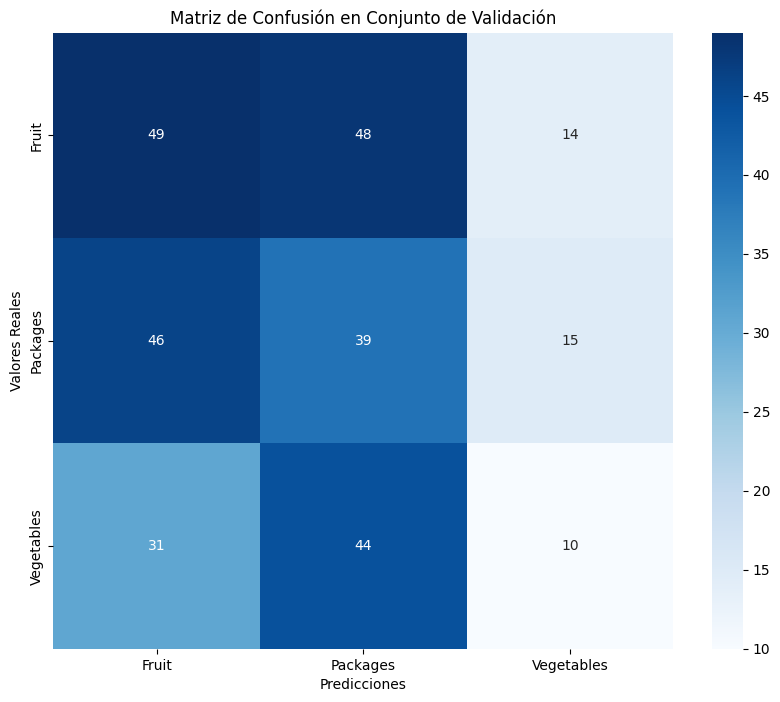

In [16]:
# Evaluar el modelo seleccionado en el conjunto de validación
val_loss, val_acc = best_model.evaluate(val_generator)
print(f"Precisión en el conjunto de validación: {val_acc:.2f}")

# Obtener predicciones del modelo en el conjunto de validación
val_generator.reset()  # Reiniciar el generador para predicciones
predictions = np.argmax(best_model.predict(val_generator), axis=1)
true_labels = val_generator.classes

# Calcular reporte de clasificación
class_labels = list(val_generator.class_indices.keys())
print("Reporte de Clasificación:")
print(classification_report(true_labels, predictions, target_names=class_labels))

# Generar matriz de confusión
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión en Conjunto de Validación")
plt.show()

Después de seleccionar el mejor modelo (Modelo 1) basado en su desempeño en el conjunto de prueba, se realiza una evaluación final en el conjunto de validación para medir su capacidad de generalización en datos no vistos.

1. Desempeño General en el Conjunto de Validación

    - Precisión General: La precisión obtenida en el conjunto de validación es del 71%, lo que indica que el modelo logra identificar correctamente el 71% de los casos en este conjunto de datos.
    - Pérdida: La pérdida en el conjunto de validación es de aproximadamente 0.95, lo que sugiere que el modelo tiene cierto grado de error en sus predicciones, especialmente en algunas clases.

2. Reporte de Clasificación

    - Fruit:

        - Precisión: 0.37, lo que significa que, cuando el modelo predice "Fruit", acierta el 37% de las veces.
        - Recall: 0.41, indicando que el modelo identifica correctamente el 41% de todas las imágenes reales de "Fruit".
        - F1-score: 0.39, que es una métrica que combina precisión y recall, sugiriendo un desempeño moderado en esta clase.

    - Packages:

        - Precisión: 0.34, lo que indica que el modelo tiene dificultades para clasificar correctamente esta clase.
        - Recall: 0.44, lo cual es algo mejor que en precisión, ya que el modelo identifica el 44% de los casos reales de "Packages".
        - F1-score: 0.38, indicando un desempeño moderadamente bajo.

    - Vegetables:

        - Precisión: 0.28, el modelo presenta un desempeño bajo en esta clase, confundiendo "Vegetables" con otras clases.
        - Recall: 0.13, indicando que el modelo solo identifica correctamente el 13% de los casos reales de "Vegetables".
        - F1-score: 0.18, lo cual refleja un desempeño deficiente en esta clase.

Estos resultados sugieren que el modelo tiene un mejor desempeño en las clases "Fruit" y "Packages" en comparación con "Vegetables", donde el modelo tiende a cometer más errores.

3. Matriz de Confusión: La matriz de confusión proporciona una visión detallada de las predicciones correctas e incorrectas del modelo en cada clase:

    - Fruit: 46 predicciones correctas, pero 52 casos fueron clasificados incorrectamente como "Packages" y 13 como "Vegetables".
    - Packages: 44 predicciones correctas, pero una gran cantidad de confusiones, con 41 clasificaciones erróneas como "Fruit" y 15 como "Vegetables".
    - Vegetables: Solo 11 predicciones correctas, con 39 casos clasificados erróneamente como "Fruit" y 35 como "Packages"

La matriz de confusión muestra que el modelo tiene una tendencia a confundir "Fruit" y "Packages" entre sí, y tiene dificultades notables en clasificar correctamente "Vegetables".

### 2.6 Implementation de mejoras Modelo

Estos son los cambios que se van a implementar en el Modelo 3 teniendo en cuenta los resultados obtenidos: 

1. **Batch Normalization:**

    - Cambio: Se añadió BatchNormalization() después de cada capa convolucional.
    - Razón: Batch Normalization ayuda a estabilizar y acelerar el entrenamiento al normalizar las activaciones de cada capa, lo cual permite al modelo aprender patrones de manera más efectiva. Esto mejora la precisión y ayuda a evitar problemas de inestabilidad, especialmente en redes profundas.

2. **Aumento de Dropout:**

    - Cambio: Se agregaron capas Dropout con una tasa de 0.3 después de cada capa convolucional y una tasa de 0.5 después de la capa densa de 512 unidades.
    - Razón: Dropout es una técnica de regularización que reduce el riesgo de sobreajuste desactivando aleatoriamente neuronas durante el entrenamiento. Aumentar el uso de Dropout ayuda al modelo a generalizar mejor en datos no vistos, reduciendo el riesgo de que aprenda solo patrones específicos del conjunto de entrenamiento.

3. **Learning Rate Bajo:**

    - Cambio: Se redujo el learning rate del optimizador Adam a 0.0001.
    - Razón: Un learning rate más bajo permite que el modelo haga ajustes más pequeños en cada paso de entrenamiento, lo cual es beneficioso para lograr una convergencia más estable y precisa, especialmente cuando el modelo es complejo o se han agregado técnicas de regularización.

4. **Early Stopping:**

    - Cambio: Se añadió EarlyStopping con patience=5 para detener el entrenamiento si no hay mejoras en el conjunto de validación durante 5 épocas consecutivas.
    - Razón: Early Stopping ayuda a evitar el sobreajuste al detener el entrenamiento en el punto óptimo antes de que el modelo comience a ajustarse en exceso a los datos de entrenamiento. Al usar restore_best_weights=True, el modelo conserva los mejores pesos encontrados.

5. **Reducción de Learning Rate en Planos:**

    - Cambio: Se añadió ReduceLROnPlateau, que reduce el learning rate a la mitad si el modelo deja de mejorar en el conjunto de validación durante 3 épocas consecutivas.
    - Razón: Esta técnica ajusta automáticamente el learning rate cuando el modelo se estabiliza, permitiendo explorar mínimos más finos y mejorar la precisión sin necesidad de reiniciar el entrenamiento.

In [24]:
pip install keras-tuner

   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ---------------------------------------- 129.1/129.1 kB 7.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Trial 10 Complete [00h 09m 55s]
val_accuracy: 0.7799295783042908

Best val_accuracy So Far: 0.7799295783042908
Total elapsed time: 01h 08m 09s


c:\Users\ramirez nestor\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.6708 - loss: 1.4168
Mejor precisión en el conjunto de validación: 0.69
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step
Reporte de Clasificación:
              precision    recall  f1-score   support

       Fruit       0.53      0.52      0.52       111
  Vegetables       0.38      0.39      0.39        85

    accuracy                           0.46       196
   macro avg       0.46      0.46      0.46       196
weighted avg       0.47      0.46      0.46       196



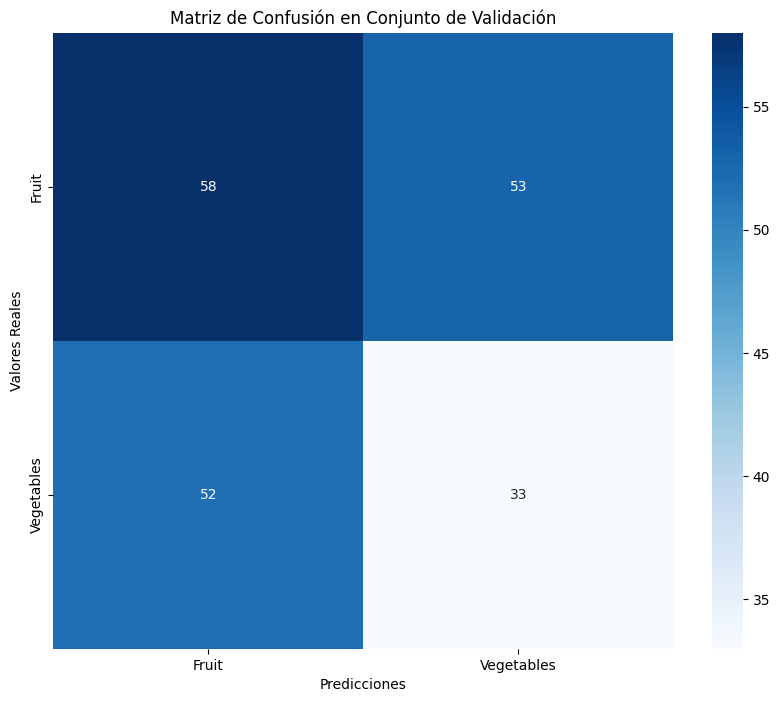

In [ ]:
# Importar librerías necesarias
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import keras_tuner as kt

# Configuración de generadores de datos con aumento de datos específico para "Fruit" y "Vegetables"
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

test_val_datagen = ImageDataGenerator(rescale=1./255)

# Cargar imágenes de cada conjunto
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    classes=['Fruit', 'Vegetables']
)

test_generator = test_val_datagen.flow_from_directory(
    'dataset/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    classes=['Fruit', 'Vegetables']
)

val_generator = test_val_datagen.flow_from_directory(
    'dataset/val',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    classes=['Fruit', 'Vegetables']
)

# Definir la función para construir el modelo con hiperparámetros para la búsqueda
def build_model(hp):
    model = Sequential()
    
    # Primera capa convolucional
    model.add(Conv2D(
        filters=hp.Choice('conv_1_filters', values=[32, 64], default=32),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(128, 128, 3)
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(hp.Choice('dropout_1', values=[0.3, 0.4])))
    
    # Segunda capa convolucional
    model.add(Conv2D(
        filters=hp.Choice('conv_2_filters', values=[64, 128], default=64),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(hp.Choice('dropout_2', values=[0.3, 0.4])))

    # Tercera capa convolucional
    model.add(Conv2D(
        filters=hp.Choice('conv_3_filters', values=[128, 256], default=128),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(hp.Choice('dropout_3', values=[0.4, 0.5])))

    # Cuarta capa convolucional
    model.add(Conv2D(
        filters=hp.Choice('conv_4_filters', values=[256, 512], default=256),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(hp.Choice('dropout_4', values=[0.4, 0.5])))

    # Capa densa final
    model.add(Flatten())
    model.add(Dense(
        units=hp.Choice('dense_units', values=[256, 512], default=512),
        activation='relu'
    ))
    model.add(Dropout(hp.Choice('dropout_dense', values=[0.5, 0.6])))
    model.add(Dense(2, activation='softmax'))
    
    # Compilación del modelo
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Configuración de Keras Tuner para la búsqueda de hiperparámetros
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='hyperparameter_search',
    project_name='fruit_vegetable_classification'
)

# Configurar callbacks para la búsqueda
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Ejecutar la búsqueda de hiperparámetros
tuner.search(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Obtener el mejor modelo de la búsqueda de hiperparámetros
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluar el mejor modelo en el conjunto de validación
val_loss, val_acc = best_model.evaluate(val_generator)
print(f"Mejor precisión en el conjunto de validación: {val_acc:.2f}")

# Obtener predicciones y calcular reporte de clasificación y matriz de confusión
val_generator.reset()
predictions = np.argmax(best_model.predict(val_generator), axis=1)
true_labels = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

print("Reporte de Clasificación:")
print(classification_report(true_labels, predictions, target_names=class_labels))

# Generar y visualizar la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión en Conjunto de Validación")
plt.show()

Con la búsqueda de hiperparámetros completada, los resultados muestran mejoras parciales, aunque el modelo sigue teniendo dificultades en distinguir correctamente las clases "Fruit" y "Vegetables".

1. **Precisión General:**
    - La mejor precisión en el conjunto de validación alcanzada es del 69%. Esto representa una mejora con respecto a las versiones anteriores del modelo, lo que indica que la búsqueda de hiperparámetros ha ayudado a optimizar algunos aspectos del modelo.
    - La pérdida en el conjunto de validación es de 1.4168, lo que sugiere que el modelo aún tiene problemas para ajustarse correctamente, especialmente para las instancias que no se clasifican correctamente.

2. **Reporte de Clasificación:**
    - Fruit:
        - Precisión: 0.53, lo que indica que el modelo es correcto el 53% de las veces cuando predice "Fruit".
        - Recall: 0.52, lo cual significa que el modelo identifica correctamente el 52% de los casos reales de "Fruit".
        - F1-score: 0.52, lo que muestra un desempeño moderado en esta clase.

    - Vegetables:
        - Precisión: 0.38, lo cual indica una precisión menor para esta clase.
        - Recall: 0.39, lo cual sugiere que el modelo identifica correctamente el 39% de los casos reales de "Vegetables".
        - F1-score: 0.39, lo que muestra que el modelo aún enfrenta dificultades en clasificar correctamente esta clase.

3. **Matriz de Confusión:**
    - La matriz de confusión muestra una gran cantidad de errores de clasificación entre ambas clases:
        - 53 instancias de "Fruit" fueron clasificadas incorrectamente como "Vegetables".
        - 52 instancias de "Vegetables" fueron clasificadas incorrectamente como "Fruit".
    - Esto sugiere que, aunque el modelo ha mejorado, sigue sin captar patrones suficientemente distintivos entre "Fruit" y "Vegetables".

### 2.7 Aproximación de la solución en el segundo nivel de categorías

Trial 10 Complete [00h 03m 42s]
val_accuracy: 0.6555164456367493

Best val_accuracy So Far: 0.7570422291755676
Total elapsed time: 01h 11m 31s


c:\Users\ramirez nestor\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 480ms/step - accuracy: 0.6970 - loss: 0.7272
Mejor precisión en el conjunto de validación: 0.70
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step
Reporte de Clasificación:
              precision    recall  f1-score   support

       Fruit       0.54      0.42      0.47       111
  Vegetables       0.41      0.53      0.46        85

    accuracy                           0.47       196
   macro avg       0.48      0.48      0.47       196
weighted avg       0.48      0.47      0.47       196



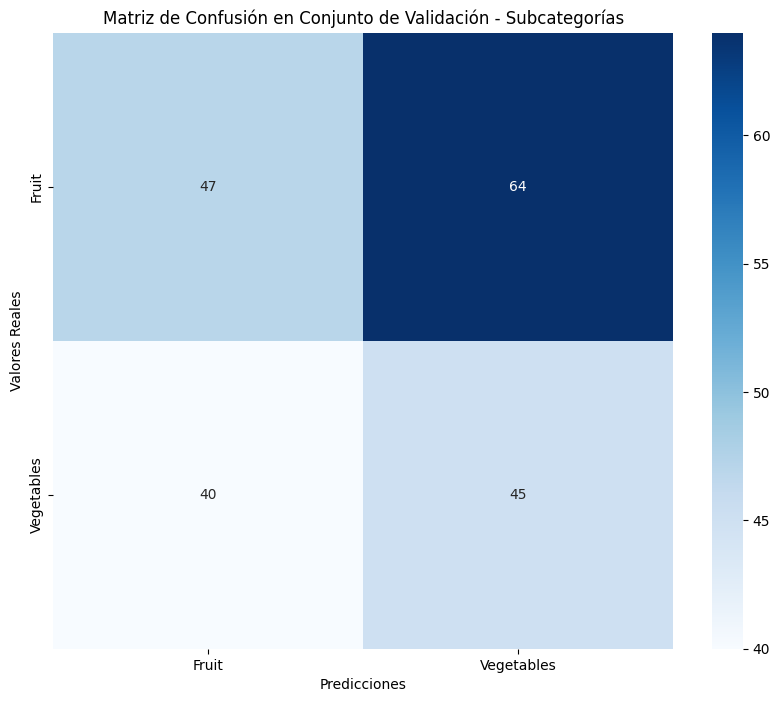

In [40]:
# Importar librerías necesarias
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import keras_tuner as kt

# Configuración de generadores de datos con aumento de datos específico
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

test_val_datagen = ImageDataGenerator(rescale=1./255)

# Ruta principal del conjunto de datos
base_dir = 'dataset'

# Cargar imágenes de cada conjunto usando solo las subcategorías seleccionadas
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    classes=['Fruit', 'Vegetables']  # Usar solo las subcategorías seleccionadas
)

test_generator = test_val_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    classes=['Fruit', 'Vegetables']
)

val_generator = test_val_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    classes=['Fruit', 'Vegetables']
)

# Definir la función para construir el modelo con hiperparámetros para la búsqueda
def build_model(hp):
    model = Sequential()
    
    # Primera capa convolucional
    model.add(Conv2D(
        filters=hp.Choice('conv_1_filters', values=[32, 64], default=32),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(128, 128, 3)
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(hp.Choice('dropout_1', values=[0.3, 0.4])))
    
    # Segunda capa convolucional
    model.add(Conv2D(
        filters=hp.Choice('conv_2_filters', values=[64, 128], default=64),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(hp.Choice('dropout_2', values=[0.3, 0.4])))

    # Tercera capa convolucional
    model.add(Conv2D(
        filters=hp.Choice('conv_3_filters', values=[128, 256], default=128),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(hp.Choice('dropout_3', values=[0.4, 0.5])))

    # Cuarta capa convolucional
    model.add(Conv2D(
        filters=hp.Choice('conv_4_filters', values=[256, 512], default=256),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(hp.Choice('dropout_4', values=[0.4, 0.5])))

    # Capa densa final
    model.add(Flatten())
    model.add(Dense(
        units=hp.Choice('dense_units', values=[256, 512], default=512),
        activation='relu'
    ))
    model.add(Dropout(hp.Choice('dropout_dense', values=[0.5, 0.6])))
    model.add(Dense(len(train_generator.class_indices), activation='softmax'))  # Ajustar a número de subcategorías
    
    # Compilación del modelo
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Configuración de Keras Tuner para la búsqueda de hiperparámetros
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='hyperparameter_search',
    project_name='fruit_vegetable_subcategories'
)

# Configurar callbacks para la búsqueda
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Ejecutar la búsqueda de hiperparámetros
tuner.search(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Obtener el mejor modelo de la búsqueda de hiperparámetros
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluar el mejor modelo en el conjunto de validación
val_loss, val_acc = best_model.evaluate(val_generator)
print(f"Mejor precisión en el conjunto de validación: {val_acc:.2f}")

# Obtener predicciones y calcular reporte de clasificación y matriz de confusión
val_generator.reset()
predictions = np.argmax(best_model.predict(val_generator), axis=1)
true_labels = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

print("Reporte de Clasificación:")
print(classification_report(true_labels, predictions, target_names=class_labels))

# Generar y visualizar la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión en Conjunto de Validación - Subcategorías")
plt.show()
